# Pandas and Matplotlib

Let's start with some basic data analysis in Python! Therefor we need two popular python packages

- ***Pandas***: "[pandas](https://pandas.pydata.org) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language*"


- ***Matplotlib***: "[Matplotlib](https://matplotlib.org) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms*"


## Installation

```conda install pandas matplotlib```

OR

```pip install pandas matplotlib```


## Powerful pandas

<img src="images/pandas.png"  width=300 align=right />


Pandas is a very powerful and flexible tool for data munging and preparing. 

Pandas deals with 3 data structures:
- **Series**: homogeneous 1-dimensional array
- **DataFrames**: heterogenous 2-dimensional array
- **Panel**: heterogenous 3-dimensional array


Pandas is best suited tabular data, that has headings associated with each column of data. The official Pandas website describes Pandas’ data-handling strengths as:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet.
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels.
- Any other form of observational / statistical data sets. The data actually need not be labelled at all to be placed into a pandas data structure.


We can not cover all aspects of python in this short tutorial. If you want to learn more about pandas have a look at the offical website https://pandas.pydata.org/ or look at the many available tutorials available on the internet

## Import the pandas library

In [ ]:
import pandas as pd

## Pandas Series

Pandas features two basic types: Series and DataFrame. Here is how they are defined and what they look like

<img src="images/dataframe.png" width=600   />

The series is a one-dimensional array-like structure designed to hold a single array of data and an associated array of data labels called index

In [ ]:
my_series = pd.Series([4.6, 2.1, -4.0, 3.0])
print(my_series)

Access the values with .values, the index with .index.

In [ ]:
print('Values', s.values)
print('Index', s.index)

For a lot of applications, a plain old Series is probably not a lot of use, but it is the core component of the Pandas workhorse, the DataFrame, so it’s useful to know about.

## DataFrames

The DataFrame represents tabular data, a bit like a spreadsheet. DataFrames are organised into colums (each of which is a Series), and each column can store a single data-type, such as floating point numbers, strings, boolean values etc. DataFrames can be indexed by either their row or column names. (They are similar in many ways to R’s data.frame.)

We can create a DataFrame in Pandas from a Python dictionary

In [ ]:
weather = {'temperature': [1.0,34.2,45.3,22.4], 'precipitation': [4.1, 3.4, 2.1, 1.3]}
pd.DataFrame(weather)

Pandas also allows the combination of multiple dictionaries with different data types

In [ ]:
df2 = pd.DataFrame({ 'Station_ID': pd.Categorical([1,2,3,4,5,6]),
                    'Date' : pd.Timestamp.today(),
                    'City' : pd.Series(['Wuerzburg','Berlin','Munich','Frankfurt','Bonn','Passau'], index=list(range(6))),
                    'Temperature' : [25.3,40.2,37.12,24.2,28.33,45.43]})
df2

## Reading data

Let's work with some real data. For this purpose we import a dataset containing observations from a DWD weather station

The main columns in the file are:

**parameter**: The name of the measured parameter (temperature_air_mean_200 (K), temperature_air_min_200 (K), temperature_air_max_200 (K), precipitation_height (mm))  
**date**: The date and time of the observation  
**value**: The measures value  


Let’s load a .csv data file into pandas! There is a function for it, called read_csv(). 

In [ ]:
df = pd.read_csv('../data/climate_data_wuerzburg.csv')
df

First of all we want to have a first glance at the data we are dealing with. Pandas provides in-built functions for data inspection.

In [ ]:
df.head

In [ ]:
df.tail()

In [ ]:
df.index               # display index

In [ ]:
df.columns  

In [ ]:
df.values   

In [ ]:
df.shape

In [ ]:
df.dtypes

## Selecting data

Pandas facilitates data selecting and indexing using three types of multi-axis indexing:

    - indexing operator [] and attribute operator .
    - label-based indexing using .loc[]
    - integer position-based indexing using .iloc[]

Columns in a dataframe object are individual Pandas Series. We can access them by using the indexing operator referring to the column name e.g. dataframe['column-name'].

In [ ]:
df['parameter']

Another way to access a column is to use the attribute operator

In [ ]:
df.parameter

Of course we can also select multiple columns using a list of column names

In [ ]:
df[['parameter', 'date', 'value']]

To select a specific column and index, we can use two indexing operators, with the first one specifying the column and the second one specifying the index. 

In [ ]:
df['value'][0]

Another way to access data in a DataFrame ist to use the label-based indexing using ```.loc [ ]```.```loc[]``` takes two single/list/range operator separated by a comma,. The first one indicates the row and the second one indicates columns. 

In [ ]:
df.loc[0, 'value']
df.loc[0,['value','parameter']]

You can even use slices to select data with .loc[]

In [ ]:
df.loc[0:10,'parameter':'value']

The last method is integer position-based indexing using .iloc[].

In [ ]:
df.iloc[0, 1]
df.iloc[0:10, 1:3]

Let's have a closer look at the at our DataFrame. In order to inspect things like max/min values or unique values we can select a column and add the method we want to apply

In [ ]:
df['parameter'].unique()
df['date'].min()
df['date'].max()

Pandas provides a large set of summary functions that operate on different kinds of pandas object

- **sum():**                 Sum values of each object.
- **count():**               Count non-NA/null values of each object.
- **median():**              Median value of each object.
- **quantile([0.25,0.75]):** Quantiles of each object.
- **apply(function):** Apply function to each object.
- **min():** Minimum value in each object.
- **max():** maximum value in each object.
- **mean():** Mean value of each object.
- **var():** Variance of each object.
- **std():** Standard deviation of each object

## Filtering Data

We can also apply conditions to the data we are inspecting, such as to filter our data.In this case we just want to extract the mean temperature

In [ ]:
df['parameter'] == 'temperature_air_mean_200'

This returns a new Series of True/False values though. To actually filter the data, we need to use this Series to mask our original

In [ ]:
df_temp = df[df['parameter'] == 'temperature_air_mean_200']

We can also can combine multiple filters. 

In [ ]:
temp_1980 = df[(df['parameter'] == 'temperature_air_mean_200') & (df['date'] >= '1980')]

## Groupby

Pandas object can be split into any of their objects with the groupby() function

In [ ]:
df.groupby('parameter').groups

Using the get_group() method, we can select a single group.

In [ ]:
df.groupby('parameter').get_group('temperature_air_max_200')

An aggregated function returns a single aggregated value for each group. Once the group by object is created, several aggregation operations can be performed on the grouped data.



In [ ]:
df.groupby('parameter')['value'].mean()

We can also use the agg() function to apply mutliple functions on our groups

In [ ]:
import numpy as np
df.groupby('parameter')['value'].agg([np.mean,np.min, np.max])

## Applying functions

Pandas also allows us to apply our own mathematical operations and function to the data. The temperature observations in our dataset is in Kelvin. Let's convert this values into other units

In [ ]:
temp_1980['value'] 

In [ ]:
temp_1980['value'] - 273.15

In [ ]:
temp_1980['value'].apply(lambda Kelvin: (Kelvin -273.15) * 9/5 + 32)

If we want to write our results back into the DataFrame we can just create a new column

In [ ]:
temp_1980['temp_celsius'] = temp_1980['value'] - 273.15
temp_1980

Of course we can also just overwrite the old data

In [ ]:
temp_1980['value'] = temp_1980['value'] - 273.15
temp_1980

## Reshaping, Cleaning, Resampling

In [1]:
import pandas as pd
df = pd.read_csv('../data/climate_data_wuerzburg.csv')

Now we know the basics about pandas DataFrames we can use our skills to reshape and clean our data frame. When working with time-series data it is recommended to change the dtype into 'datatime' and use the dates as index

In [2]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [3]:
df = df.set_index('date')
df.index

DatetimeIndex(['1947-01-01 00:00:00+00:00', '1947-01-02 00:00:00+00:00',
               '1947-01-03 00:00:00+00:00', '1947-01-04 00:00:00+00:00',
               '1947-01-05 00:00:00+00:00', '1947-01-06 00:00:00+00:00',
               '1947-01-07 00:00:00+00:00', '1947-01-08 00:00:00+00:00',
               '1947-01-09 00:00:00+00:00', '1947-01-10 00:00:00+00:00',
               ...
               '2020-12-22 00:00:00+00:00', '2020-12-23 00:00:00+00:00',
               '2020-12-24 00:00:00+00:00', '2020-12-25 00:00:00+00:00',
               '2020-12-26 00:00:00+00:00', '2020-12-27 00:00:00+00:00',
               '2020-12-28 00:00:00+00:00', '2020-12-29 00:00:00+00:00',
               '2020-12-30 00:00:00+00:00', '2020-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=108116, freq=None)

Next we can reshape our data frame so that we have one column for each parameter

In [4]:
df_resh = pd.DataFrame(index=df.index.unique().sort_values())
df_resh['temp_max'] = df.groupby('parameter').get_group('temperature_air_max_200').sort_index()['value']
df_resh['temp_min'] = df.groupby('parameter').get_group('temperature_air_min_200').sort_index()['value']
df_resh['temp_mean'] = df.groupby('parameter').get_group('temperature_air_mean_200').sort_index()['value']
df_resh['precipitation'] = df.groupby('parameter').get_group('precipitation_height').sort_index()['value']
df_resh

,temp_max,temp_min,temp_mean,precipitation
date,,,,
1947-01-01 00:00:00+00:00,NaN,NaN,270.35,2.4
1947-01-02 00:00:00+00:00,NaN,NaN,272.55,0.4
1947-01-03 00:00:00+00:00,NaN,NaN,272.45,0.0
1947-01-04 00:00:00+00:00,NaN,NaN,264.95,0.0
1947-01-05 00:00:00+00:00,NaN,NaN,260.25,0.0
...,...,...,...,...
2020-12-27 00:00:00+00:00,276.35,270.75,273.15,1.6
2020-12-28 00:00:00+00:00,276.75,272.55,275.05,0.7
2020-12-29 00:00:00+00:00,277.75,273.45,275.15,0.4


Now we can start to clean our dataset. First we can check how many missing obervations we have and remove them. With the .isnull() function we can easily find all cells in our data frame with NaN values. 

In [5]:
number_of_nulls = df_resh.isnull().sum()
number_of_nulls

temp_max         90
temp_min         90
temp_mean         0
precipitation     0
dtype: int64

We can drop these rows using the .dropna function

In [6]:
df_cleaned = df_resh.dropna(inplace=False)
df_cleaned

,temp_max,temp_min,temp_mean,precipitation
date,,,,
1947-04-01 00:00:00+00:00,287.35,278.75,281.85,0.1
1947-04-02 00:00:00+00:00,285.35,275.35,279.85,22.4
1947-04-03 00:00:00+00:00,285.85,279.25,281.35,2.5
1947-04-04 00:00:00+00:00,286.55,279.45,282.55,0.4
1947-04-05 00:00:00+00:00,282.15,277.35,278.05,0.0
...,...,...,...,...
2020-12-27 00:00:00+00:00,276.35,270.75,273.15,1.6
2020-12-28 00:00:00+00:00,276.75,272.55,275.05,0.7
2020-12-29 00:00:00+00:00,277.75,273.45,275.15,0.4


To simplify our plot we can aggregate the data for each year using the .resample() method. To aggregate or temporal resample the data for a time period, you can take all of the values for each year and summarize them.

In [7]:
df_resampled = df_cleaned.resample('Y').mean()
df_resampled['precipitation'] = df_cleaned['precipitation'].resample('Y').sum()
df_resampled = df_resampled.set_index(df_resampled.index.year)
df_resampled

,temp_max,temp_min,temp_mean,precipitation
date,,,,
1947,292.580909,281.063818,286.677273,367.5
1948,287.920219,278.477596,282.893169,570.5
1949,288.525890,278.455479,283.290000,442.9
1950,287.360685,278.322329,282.623425,688.8
1951,287.348356,278.748082,282.831370,531.4
...,...,...,...,...
2016,287.974863,279.336066,283.487432,550.8
2017,288.146438,279.309726,283.545068,628.9
2018,290.046986,280.126986,284.892192,432.1


Let's save our new dataset to disk

In [9]:
df_resampled.to_csv('../data/climate_wuerzburg_cleand.csv')

## Basic data visualisation

<img src="https://pandas.pydata.org/docs/_images/04_plot_overview.svg"/>
https://pandas.pydata.org/docs/_images/04_plot_overview.svg"

Pandas allows us to do some basic plotting using the ```.plot()``` method

In [11]:
df = pd.read_csv('../data/climate_wuerzburg_cleand.csv')
df

,date,temp_max,temp_min,temp_mean,precipitation
0,1947,292.580909,281.063818,286.677273,367.5
1,1948,287.920219,278.477596,282.893169,570.5
2,1949,288.525890,278.455479,283.290000,442.9
3,1950,287.360685,278.322329,282.623425,688.8
4,1951,287.348356,278.748082,282.831370,531.4
...,...,...,...,...,...
69,2016,287.974863,279.336066,283.487432,550.8
70,2017,288.146438,279.309726,283.545068,628.9
71,2018,290.046986,280.126986,284.892192,432.1
72,2019,289.310274,279.627534,284.357671,490.7


In [12]:
df=df[df['date'] >= 1970]

<AxesSubplot:>

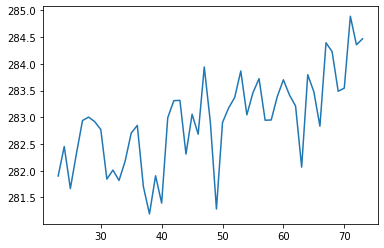

In [13]:
df['temp_mean'].plot()

<AxesSubplot:>

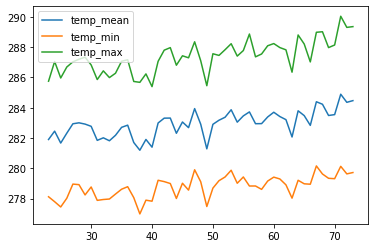

In [14]:
df[['temp_mean','temp_min','temp_max']].plot()

<AxesSubplot:xlabel='temp_mean', ylabel='precipitation'>

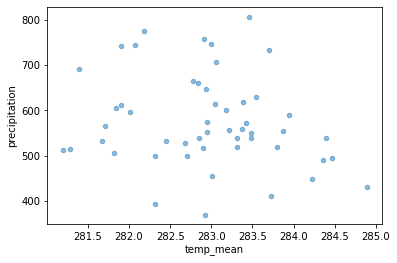

In [16]:
df.plot.scatter(x="temp_mean", y="precipitation", alpha=0.5)

Apart from the default line plot when using the plot function, a number of alternatives are available to plot data. Let’s use some standard Python to get an overview of the available plot methods:

- area
- bar
- barh
- box
- density
- hexbin
- hist
- kde
- line
- pie
- scatter

<AxesSubplot:>

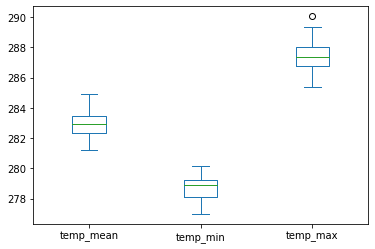

In [17]:
df[['temp_mean','temp_min','temp_max']].plot.box()

Plotting in pandas is heavily based on matplotlib, which allows to also use the matplotlib methods to costumize our plot.

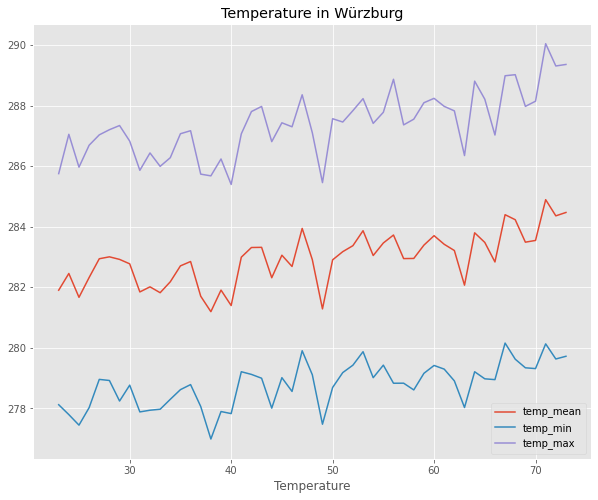

In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df[['temp_mean','temp_min','temp_max']].plot(figsize=(10,8))                # Use pandas to put the area plot on the prepared Figure/Axes
plt.title('Temperature in Würzburg')  
plt.xlabel('Temperature')
plt.legend(loc='lower right')
plt.show()

### Understand the basics of the Matplotlib

Producing high-quality graphics is one of the main reasons for doing statistical computing. For this purpose, we will use the matplotlib library, which is probably the most used python library for 2D-graphics. Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. Matplotlib allows a quick data visualization and the creation of publication-quality figures. It would be impossible to cover the entirety of Matplotlib in one tutorial, so this section is really to give you a flavour of the capabilities of Matplotlib

If you have a bit of basic Python knowledge already, the common route to learning Matplotib is to find examples of plots similar to ones you are trying to create and walk through them, trying to reproduce them with your own data perhaps.

In [ ]:
%pip install matplotlib

Like Pandas, Matplotlib has a few conventions that you will see in the examples, and in resources on other websites such as StackOverflow. Typically, if we are going to work on some plotting, we would import matplotlib like this:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

### Basic Plots

Let's use our temperatur data to create a simple line plot with matplotlib showing the mean annual temperature between 1970-2020

In [ ]:
df = pd.read_csv('../data/climate_wuerzburg_cleand.csv')
df

In [ ]:
df=df[df['date'] >= 1970]

In [ ]:
temp = df['temp_mean']
plt.plot(temp)

We can also just use our pandas dataframe directly and just select the column we want to plot

In [ ]:
plt.plot(df['temp_mean'])

Okay now we have plotted our temperature data in order to make this a proper time series plot we should also add the observation dates

In [ ]:
plt.plot(df['date'], df['temp_mean'])

In [ ]:
df = df.set_index('date')

In [ ]:
plt.plot(df['temp_mean'])

If we use our dates as index matplotlib will automatically uses our index

We just gave a list of numbers to plt.plot() and it drew a line chart automatically. It assumed the values of the X-axis to start from zero going up to as many items in the data.   
Notice the line matplotlib.lines.Line2D in code output? That’s because Matplotlib returns the plot object itself besides drawing the plot.  
If you only want to see the plot, add plt.show() at the end and execute all the lines in one shot.  

In [ ]:
plt.plot(df['temp_mean'])
plt.show()

plt.plot drew a line plot. That’s because of the default behaviour.So how to draw a scatterplot instead?

Well to do that, let’s understand a bit more about what arguments plt.plot() expects. The plt.plot accepts 3 basic arguments in the following order: (x, y, format). In order to change the style of our plot we can user different format combinations. This format is a short hand combination of {color}{marker}{line}

In [ ]:
plt.plot(df['temp_mean'], "+")
plt.show()

In [ ]:
plt.plot(df['temp_mean'], "k--")
plt.show()

In [ ]:
plt.plot(df['temp_mean'], "gD-.")
plt.show()

If you want to know more about the different colors, makers and line styles

In [ ]:
help(plt.plot)

Of course matplotlib offers a huge range of differnt plots besides a simple line plot

In [ ]:
plt.hist(df['temp_mean'])
plt.show()

In [ ]:
plt.bar(df.index,df['temp_mean'])
plt.show()

In [ ]:
plt.scatter(df['temp_mean'],df['precipitation'])
plt.show()

In [ ]:
plt.stem(df.index,df['temp_mean'])
plt.show()

If you want to know more about different plots you can create in matplotlib have a look at https://matplotlib.org/devdocs/gallery/index.html

### Advanced plotting

Okay what is if we want to plot 2 lines in the same figure. Simply call plt.plot() again

In [ ]:
plt.plot(df['temp_max'], "r")
plt.plot(df['temp_min'], "b")

Now we can add some basic plot features: Title, Legend, X and Y axis labels



In [ ]:
plt.plot(df['temp_min'], "b", label = 'Minimum Temperature')
plt.plot(df['temp_max'], "r", label = 'Maximum Temperature')
plt.title('Annual Temperature in Würzburg 1970-2020')
plt.xlabel('Observation number')
plt.ylabel('Temperature in Celsius')
plt.legend(loc='best')  # legend text comes from the plot's label parameter.
plt.show()

Of course there are many parameters you can set in matplotlib in order to create more sophisticated plots

In [ ]:
plt.figure(figsize=(10,7), dpi=120)
plt.plot(df.index, df['temp_max'], c='red', label='Max Temperature')
plt.plot(df.index, df['temp_min'], c='blue', label='Min Temperature')
plt.fill_between(x = df.index, y1 = df['temp_mean'], y2 = df['temp_max'], facecolor='lightcoral')
plt.fill_between(x = df.index, y1 = df['temp_mean'], y2 = df['temp_min'], facecolor='lightblue')
plt.plot(df.index,df['temp_mean'],c='orange', linewidth=3, label='Mean Temperature')
plt.xlim(1970,2020)
plt.grid(True)
plt.legend(loc='best')
plt.title('Annual Temperature in Würzburg 1970-2020')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

####   The Matplotlib Object Hierarchy


- When we call plt.plot(x, y), we internally create a hierarchy of nested Python objects: Figure and Axes.

- A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects.

- An Axes actually translates into what we think of as an individual plot or graph

- Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels


<img src="images/matplot.png"/>


Although this looks more complicated using this method gives us full control over the plot. Let’s understand figure and axes in little more detail. Suppose, I want to plot minimum and maximum temperature in two separate plots side-by-side instead of the same plot.

You can do that by creating two separate subplots, aka, axes using plt.subplots(1, 2). This creates and returns two objects:
* the figure
* the axes (subplots) inside the figure

Notice in below code, we call ax1.plot() and ax2.plot() instead of calling plt.plot() twice.

In [ ]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(df['temp_max'], 'r')  
ax2.plot(df['temp_min'], 'b')

# Title, X and Y labels
ax1.set_title('Annual Minimum Temperature (°C) 1970-2020') 
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)')

ax2.set_title('Annual Maximum Temperature (°C) 1970-2020')
ax2.set_ylabel('Temperature (°C)') 
ax2.set_xlabel('Year')

plt.tight_layout()
plt.show()

Or we can even combine temperature and precipitation in one plot

In [ ]:
date = df.index
temp = df['temp_mean']
prec = df['precipitation']

fig, ax1 = plt.subplots(figsize=(10,7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(date, temp, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Precipitation (mm)', color=color)  # we already handled the x-label with ax1
ax2.plot(date, prec, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

If you don't like the standard plotting style of matplotlib you can easily switch to another one using plt.style.use(). For more styles look at https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [ ]:
plt.style.use('ggplot')
#plt.style.use('dark_background')
#plt.style.use('fivethirtyeight')
#plt.style.use('grayscale')

plt.plot(df['date'], df['temp_mean'])

### Seaborn

Another powerful Python visualization library is seaborn which is based on matplotlib. Seaborn can do the same things as matplotlib and it makes plotting easier. It is often preferred, because user think the default settings in seaborn are more pleasing then in matplotlib. And the good thing is, if you know matplotlib, seaborn is really easy to learn. 
Let´s try some nice example plots (More plot examples can be found on http://seaborn.pydata.org/). 

In [10]:
import seaborn as sns

sns.lineplot(x=df.index, y=df['temp_mean'], linewidth=2.5)

KeyError: 'temp_mean'

In [ ]:
sns.set(style="darkgrid")

plt.figure(figsize=(13, 5))
ax = sns.scatterplot(x=df.index, y=df['temp_mean'],  hue=df['temp_mean'])

In [ ]:
plt.figure(figsize=(13, 8))
ax = sns.regplot(df.index, df['temp_mean'])